### IMDb - EDA

Explore the data, this may require additional cleaning.  The ultimate goal is to determine what factors will get us a good movie reviews.

In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.

In [72]:
# Load the data. 
df = pd.read_csv('cleandata/IMDb.csv')

In [73]:
df.head()

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,types,isOriginalTitle,averageRating,numVotes,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0035423,movie,Kate & Leopold,2001.0,118.0,"Comedy,Fantasy,Romance",NaN,0.0,6.4,79054.0,...,0,0,1,0,0,0,0,0,0,0
1,tt0036177,movie,Muhomatsu no issho,2008.0,100.0,"Action,Adventure",alternative,0.0,7.3,75.0,...,0,0,0,0,0,0,0,0,0,0
2,tt0059325,movie,Born in '45,1990.0,100.0,"Drama,Romance",NaN,0.0,6.5,208.0,...,0,0,1,0,0,0,0,0,0,0
3,tt0059900,movie,"Wenn du groß bist, lieber Adam",1990.0,78.0,"Drama,Fantasy",video,0.0,6.8,26.0,...,0,0,0,0,0,0,0,0,0,0
4,tt0064730,movie,Japan Organized Crime Boss,2000.0,97.0,"Action,Crime",NaN,0.0,7.0,172.0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154711 entries, 0 to 154710
Data columns (total 37 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           154711 non-null  object 
 1   titleType        154711 non-null  object 
 2   primaryTitle     154711 non-null  object 
 3   startYear        109720 non-null  float64
 4   runtimeMinutes   92842 non-null   float64
 5   genres           149884 non-null  object 
 6   types            36909 non-null   object 
 7   isOriginalTitle  154695 non-null  float64
 8   averageRating    71030 non-null   float64
 9   numVotes         71030 non-null   float64
 10  Action           154711 non-null  int64  
 11  Adult            154711 non-null  int64  
 12  Adventure        154711 non-null  int64  
 13  Animation        154711 non-null  int64  
 14  Biography        154711 non-null  int64  
 15  Comedy           154711 non-null  int64  
 16  Crime            154711 non-null  int6

Our dependant variable for this analysis is the averageRating, which we see has numerous nulls.  We also see that there are null values for the startYear and our goal was to review movies over the last 30 years.  We'll explore these 2 values now.

In [75]:
df['averageRating'].describe()

count    71030.000000
mean         6.117770
std          1.493007
min          1.000000
25%          5.200000
50%          6.300000
75%          7.200000
max         10.000000
Name: averageRating, dtype: float64

(array([  254.,  1254.,  3381.,  6170., 10474., 15380., 17562., 11476.,
         4504.,   575.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

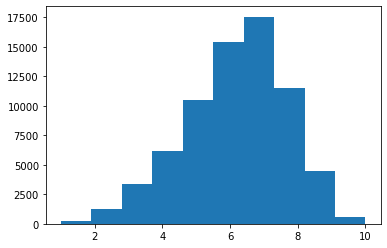

In [76]:
plt.hist(df['averageRating'])

In [77]:
df['startYear'].unique()

array([2001., 2008., 1990., 2000., 2018., 1993., 1991., 2005., 1992.,
       1998., 1995., 2017., 1997., 1996., 1994., 2004., 1999., 2002.,
       2019., 2003.,   nan, 2007., 2021., 2009., 2006., 2013., 2010.,
       2016., 2011., 2012., 2020., 2015., 2014., 2022.])

Let's get rid of startYear nan values, based on the info() method we should be left with 109720 records.

In [78]:
df = df.dropna(subset=['startYear'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109720 entries, 0 to 154709
Data columns (total 37 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           109720 non-null  object 
 1   titleType        109720 non-null  object 
 2   primaryTitle     109720 non-null  object 
 3   startYear        109720 non-null  float64
 4   runtimeMinutes   90121 non-null   float64
 5   genres           105974 non-null  object 
 6   types            35592 non-null   object 
 7   isOriginalTitle  109716 non-null  float64
 8   averageRating    71022 non-null   float64
 9   numVotes         71022 non-null   float64
 10  Action           109720 non-null  int64  
 11  Adult            109720 non-null  int64  
 12  Adventure        109720 non-null  int64  
 13  Animation        109720 non-null  int64  
 14  Biography        109720 non-null  int64  
 15  Comedy           109720 non-null  int64  
 16  Crime            109720 non-null  int6

Unfortunately we still have movies without an averageRating so we will cleanup some more, this should leave us with 71022 records.

In [79]:
df = df.dropna(subset=['averageRating'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71022 entries, 0 to 154709
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           71022 non-null  object 
 1   titleType        71022 non-null  object 
 2   primaryTitle     71022 non-null  object 
 3   startYear        71022 non-null  float64
 4   runtimeMinutes   66193 non-null  float64
 5   genres           69807 non-null  object 
 6   types            32784 non-null  object 
 7   isOriginalTitle  71022 non-null  float64
 8   averageRating    71022 non-null  float64
 9   numVotes         71022 non-null  float64
 10  Action           71022 non-null  int64  
 11  Adult            71022 non-null  int64  
 12  Adventure        71022 non-null  int64  
 13  Animation        71022 non-null  int64  
 14  Biography        71022 non-null  int64  
 15  Comedy           71022 non-null  int64  
 16  Crime            71022 non-null  int64  
 17  Documentary

(array([  254.,  1254.,  3381.,  6169., 10472., 15379., 17562., 11473.,
         4503.,   575.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

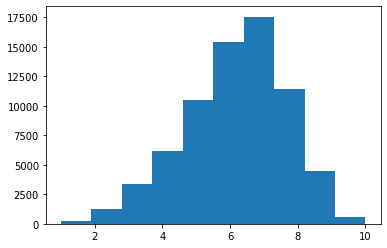

In [80]:
# recreate hist on averageRating
plt.hist(df['averageRating'])

In [81]:
df['averageRating'].describe()

count    71022.000000
mean         6.117716
std          1.492975
min          1.000000
25%          5.200000
50%          6.300000
75%          7.200000
max         10.000000
Name: averageRating, dtype: float64

One more thing we want to do is convert runtimeMinutes as this is too variable.  Generally most people think of movie durations in terms of half an hour so we will create a new column called runtime30 and set it to runtimeMinutes//30

In [82]:
df['runtime30'] = df['runtimeMinutes']/30

In [83]:
df['runtime30'].describe()

count    66193.000000
mean         3.148196
std          6.694985
min          0.033333
25%          2.766667
50%          3.033333
75%          3.400000
max       1714.000000
Name: runtime30, dtype: float64

Wow, there is a max value 1714, which means the movie length is 857 hours.  Apparently we need to investigate this. Let's look at movies >= 5 hrs (runtime30 >= 10)

In [84]:
df[df['runtime30']>=10].describe()

,startYear,runtimeMinutes,isOriginalTitle,averageRating,numVotes,Action,Adult,Adventure,Animation,Biography,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,runtime30
count,46.000000,46.000000,46.0,46.000000,46.000000,46.000000,46.0,46.000000,46.0,46.000000,...,46.0,46.000000,46.000000,46.0,46.000000,46.0,46.000000,46.000000,46.0,46.000000
mean,2011.086957,1554.847826,0.0,7.386957,3084.456522,0.108696,0.0,0.043478,0.0,0.043478,...,0.0,0.021739,0.021739,0.0,0.021739,0.0,0.021739,0.021739,0.0,51.828261
std,6.807924,7517.196697,0.0,1.402475,12676.440069,0.314696,0.0,0.206185,0.0,0.206185,...,0.0,0.147442,0.147442,0.0,0.147442,0.0,0.147442,0.147442,0.0,250.573223
min,1994.000000,300.000000,0.0,3.400000,5.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,10.000000
25%,2008.000000,341.250000,0.0,6.800000,25.250000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,11.375000
50%,2012.000000,383.500000,0.0,7.600000,57.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,12.783333
75%,2016.000000,495.000000,0.0,8.400000,349.750000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,16.500000
max,2020.000000,51420.000000,0.0,9.500000,82540.000000,1.000000,0.0,1.000000,0.0,1.000000,...,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0,1714.000000


There are only 46 movies > 5 hrs but these are extremes that we want to be excluded, so we will subset the data further before continuing with any evaluation

In [85]:
df = df[df['runtime30']<=10]

In [86]:
df['runtime30'].describe()

count    66150.000000
mean         3.114656
std          0.701567
min          0.033333
25%          2.766667
50%          3.033333
75%          3.400000
max         10.000000
Name: runtime30, dtype: float64

Let's do something similar with startYear.  While we can't tell a movie to be made in a specific year, we can refer to a movie type from a given year.  For this we are going to psuedo scale the startYear 1990 - present to be 1 to currentYear - 1989 and call this yearScale.

In [87]:
df['yearScale'] = df['startYear'] - 1989

In [88]:
df['yearScale'].describe()

count    66150.000000
mean        20.793621
std          7.870496
min          1.000000
25%         16.000000
50%         23.000000
75%         27.000000
max         32.000000
Name: yearScale, dtype: float64

Let's do some final cleaning.  We are going to remove the following columns
1. tconst
2. titleType - all are set to 'movies'
3. primaryTitle
4. runtimeMinutes - we converted to 30 minute blocks
5. numVotes - this was used to get rating but is not something we will use for measuring
6. isOriginalTitle
7. startYear - because we scaled it to yearScale
8. types - the vast majority of these are labeled 'imdbDisplay', these values don't seem to be within our control
9. genres - we've already pulled this data out into separate columns


In [89]:
df = df.drop(['tconst', 'titleType', 'primaryTitle', 'runtimeMinutes', 'numVotes', 'isOriginalTitle', 'startYear', 'types', 'genres'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66150 entries, 0 to 154709
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averageRating  66150 non-null  float64
 1   Action         66150 non-null  int64  
 2   Adult          66150 non-null  int64  
 3   Adventure      66150 non-null  int64  
 4   Animation      66150 non-null  int64  
 5   Biography      66150 non-null  int64  
 6   Comedy         66150 non-null  int64  
 7   Crime          66150 non-null  int64  
 8   Documentary    66150 non-null  int64  
 9   Drama          66150 non-null  int64  
 10  Family         66150 non-null  int64  
 11  Fantasy        66150 non-null  int64  
 12  Game-Show      66150 non-null  int64  
 13  History        66150 non-null  int64  
 14  Horror         66150 non-null  int64  
 15  Music          66150 non-null  int64  
 16  Musical        66150 non-null  int64  
 17  Mystery        66150 non-null  int64  
 18  News 

Let's see if the there are any correlations

In [90]:
df.corr()

,averageRating,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,runtime30,yearScale
averageRating,1.000000,-0.150535,-0.003898,-0.039957,0.007160,0.149937,-0.060028,-0.027042,0.400831,0.069683,...,-0.006337,-0.143927,0.006126,0.057111,0.000359,-0.209155,0.034569,-0.035955,0.036804,0.016327
Action,-0.150535,1.000000,-0.001455,0.246311,0.051730,-0.056006,-0.054133,0.183101,-0.173910,-0.075620,...,-0.093243,0.113704,-0.004364,-0.017249,-0.002520,0.059701,0.004364,0.005555,0.133147,-0.045550
Adult,-0.003898,-0.001455,1.000000,-0.001039,-0.000629,-0.000870,0.006641,-0.001235,-0.001982,0.004581,...,-0.001315,-0.000826,-0.000045,-0.000532,-0.000026,-0.001548,-0.000450,-0.000305,-0.002483,-0.005332
Adventure,-0.039957,0.246311,-0.001039,1.000000,0.258826,-0.023311,0.034415,-0.041167,-0.081497,-0.100476,...,-0.068523,0.037754,-0.003116,-0.015336,-0.001799,-0.074071,-0.022387,0.007858,0.040844,-0.003135
Animation,0.007160,0.051730,-0.000629,0.258826,1.000000,-0.016362,0.026969,-0.039088,-0.068237,-0.093904,...,-0.048356,0.001949,-0.001886,-0.017133,-0.001089,-0.062443,-0.013659,-0.011446,-0.054349,0.017379
Biography,0.149937,-0.056006,-0.000870,-0.023311,-0.016362,1.000000,-0.086692,-0.006157,0.204059,0.000311,...,-0.046157,-0.045796,-0.002609,0.048633,-0.001506,-0.083493,-0.004725,-0.009337,0.030232,0.039470
Comedy,-0.060028,-0.054133,0.006641,0.034415,0.026969,-0.086692,1.000000,-0.041272,-0.255088,-0.082370,...,0.174904,-0.051465,-0.000885,-0.023339,-0.003943,-0.188950,-0.053429,-0.028985,0.035027,-0.070549
Crime,-0.027042,0.183101,-0.001235,-0.041167,-0.039088,-0.006157,-0.041272,1.000000,-0.121883,0.092899,...,-0.063406,-0.053880,-0.003706,-0.035293,-0.002140,0.114125,-0.031696,-0.016167,0.094869,-0.057104
Documentary,0.400831,-0.173910,-0.001982,-0.081497,-0.068237,0.204059,-0.255088,-0.121883,1.000000,-0.360672,...,-0.165249,-0.102674,0.000458,0.079840,0.007661,-0.199876,0.027455,-0.029420,-0.244733,0.095251
Drama,0.069683,-0.075620,0.004581,-0.100476,-0.093904,0.000311,-0.082370,0.092899,-0.360672,1.000000,...,0.153857,-0.085611,0.005862,-0.016920,-0.005716,-0.049370,0.031536,-0.013044,0.230719,-0.037868


Using a pairplot for the above would probably result in an "overload", instead we're going to create scatterplots with averageRating as the "y" or all other values. 

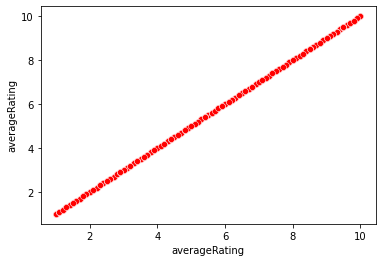

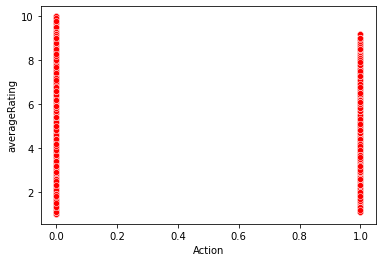

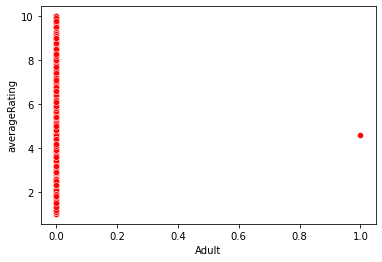

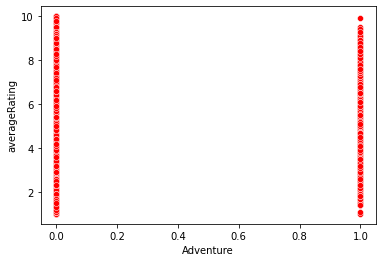

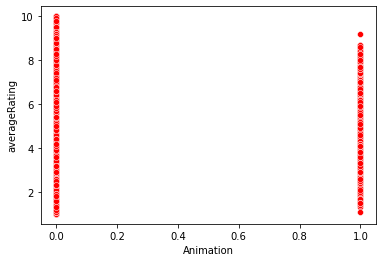

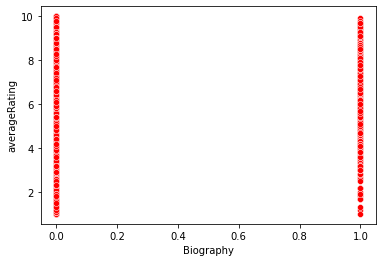

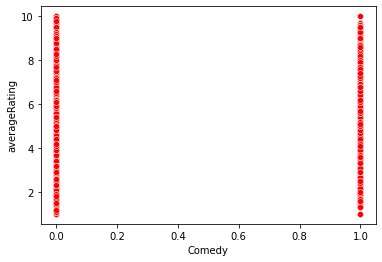

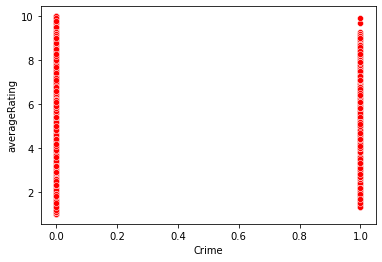

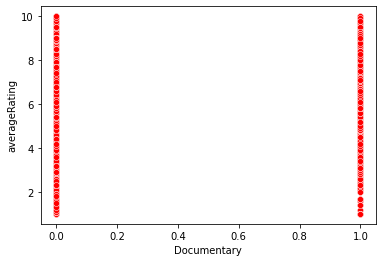

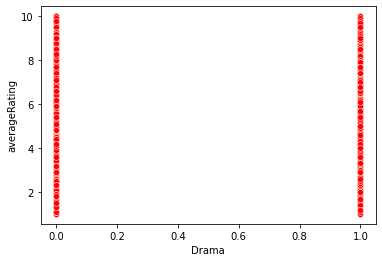

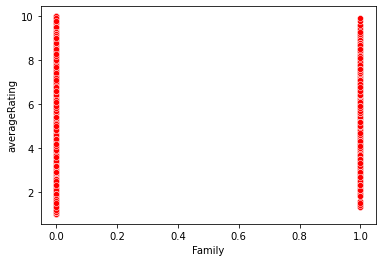

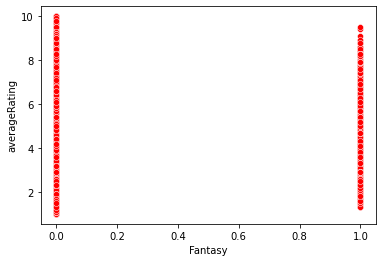

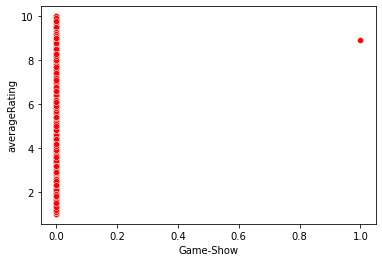

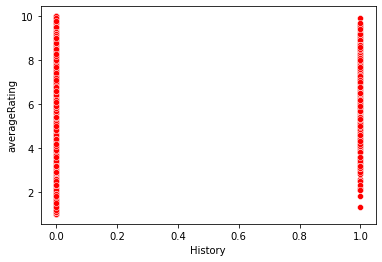

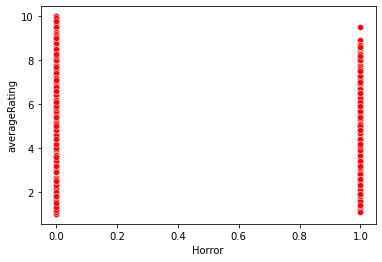

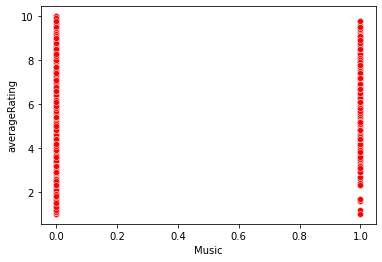

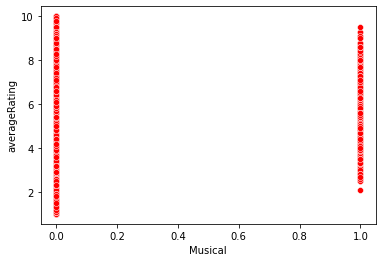

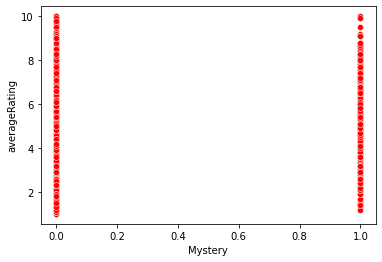

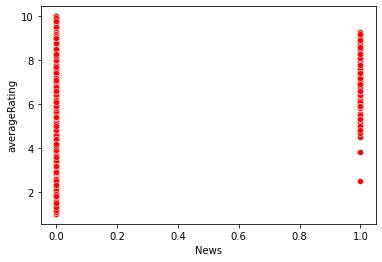

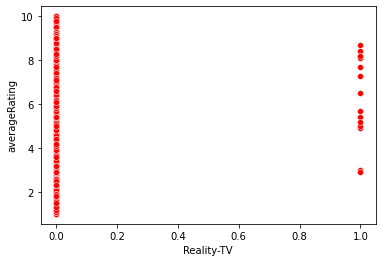

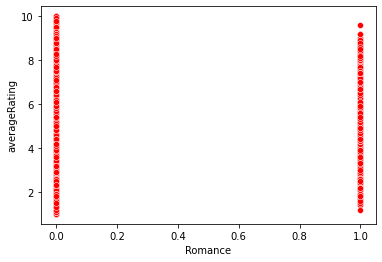

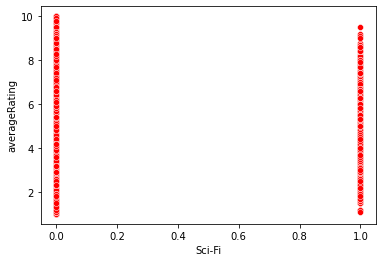

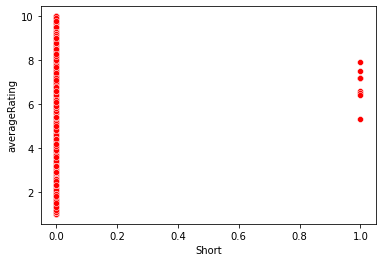

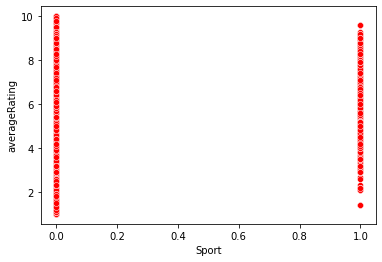

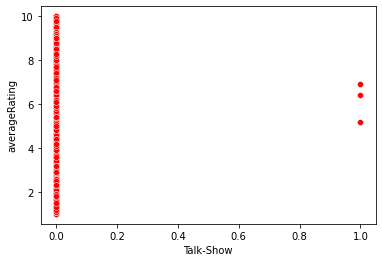

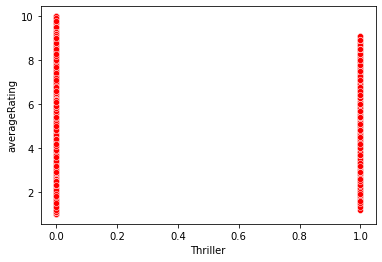

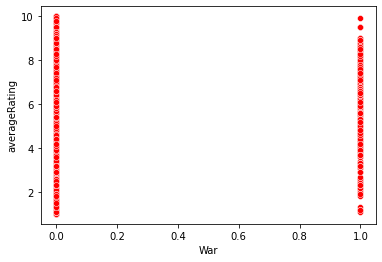

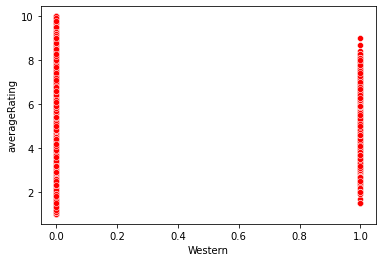

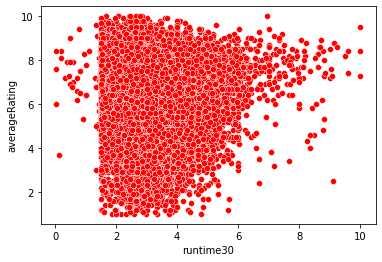

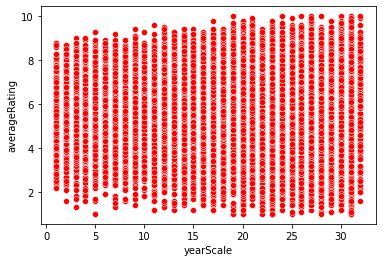

In [91]:
for i in df.corr().columns:
    sns.scatterplot(x=i, y='averageRating', data=df, color='red')
    plt.ylabel('averageRating')
    plt.xlabel(i)
    plt.show()

In [92]:
df.to_csv('cleandata/IMDb_modeling.csv', index=False)

### Conclusion

Most of our EDA consisted of further cleaning of our data so that we can perform Modeling.  

First we identified the avarageRating as our "dependant" variable and cleared our any null values.  Also our goal is to use the movies from 1990 to present for our modeling so any moviews without a startYear were also cleared from the dataset.

We then pseudo scales the runtime minutes into blocks of 30 minutes and also did something similar for startYear, so that 1990 would have a value of 1 and each subsequent year would have 1 added.  We then dropped our "object" fields as they would be useless in any modeling to come.

We then generated used the .corr() function to see what, if any correlations exist between the avarageRating and the remaining numeric fields and plotted these as scatterplots.  As of now there isn't anything that we can visually see that has correlation, so our next step of modeling will hopefully provide more insight.

Lastly we wrote our remaining dataset to a new csv file for consumption during the modeling process.